In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
import matplotlib
def nested_dict(n, type):
    if n==1:
        defaultdict(type)
    else:
        return defaultdict(lambda: nested_dict(n-1, type))

In [2]:
data = nested_dict(4, list)
z_all= [100, 50, 10, 6, 1, 0.5, 0]

data['bg']['cg'] =  np.loadtxt("./Cubic_galilan/CG/file__background.dat")
data['bg']['lcdm'] =  np.loadtxt("./Cubic_galilan/LCDM/file__background.dat")

for z in z_all:
    index = z_all.index(z);
    data['phi']['cg']['z='+str(z)] = np.loadtxt("./Cubic_galilan/CG/pk00"+str(index)+"_phi.dat")
    data['delta']['cg']['z='+str(z)] = np.loadtxt("./Cubic_galilan/CG/pk00"+str(index)+"_delta.dat")
    
    data['phi']['lcdm']['z='+str(z)] = np.loadtxt("./Cubic_galilan/LCDM/pk00"+str(index)+"_phi.dat")
    data['delta']['lcdm']['z='+str(z)] = np.loadtxt("./Cubic_galilan/LCDM/pk00"+str(index)+"_delta.dat")


## Plots:

### Background

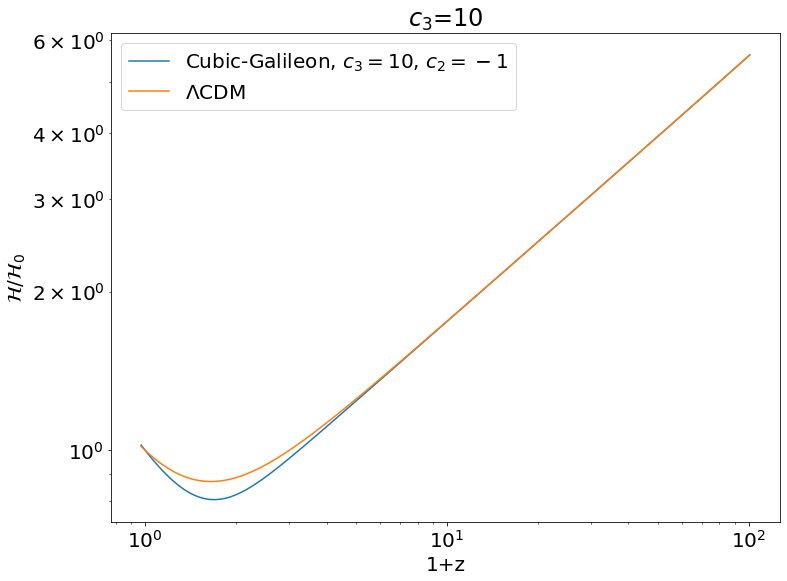

In [3]:
plt.rcParams['font.size'] = 20
fig = plt.figure(figsize=(12,9))

plt.loglog(1./data['bg']['cg'][:,2], data['bg']['cg'][:,3], "-",  label = "Cubic-Galileon, $c_3=10$, $c_2 = -1$")
plt.loglog(1./data['bg']['lcdm'][:,2], data['bg']['lcdm'][:,3], "-", label = "$\Lambda$CDM")


plt.title(r"$c_3 $=10")
plt.xlabel("1+z")
plt.ylabel("$\mathcal{H}/\mathcal{H}_0$")
# plt.ylim(0.001, 0.5)
# plt.xlim(0.005, 0.8)
# plt.yscale('log')
plt.legend()

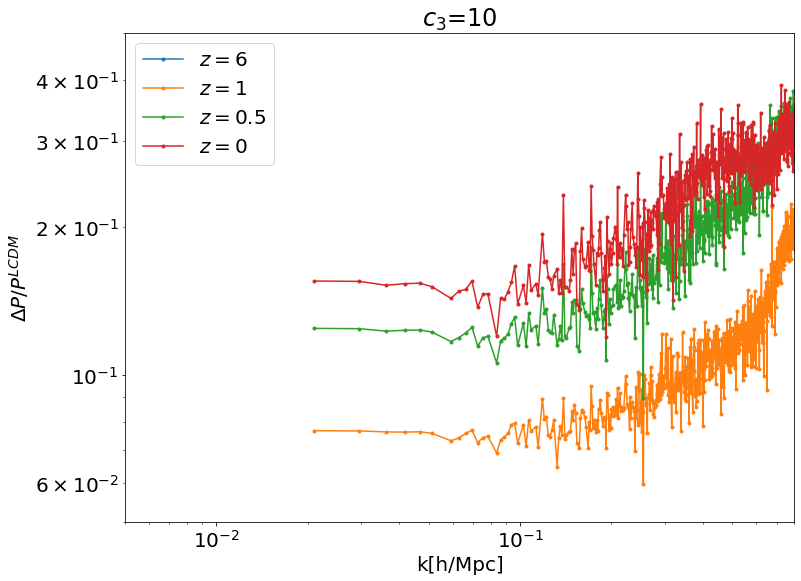

In [8]:
plt.rcParams['font.size'] = 20
fig = plt.figure(figsize=(12,9))

for z in [6, 1,0.5,0]:

    k_ec_ref =  data['delta']['lcdm']['z='+str(z)][:,0]
    p_ec_ref =  data['delta']['lcdm']['z='+str(z)][:,1]

    k_ec = data['delta']['cg']['z='+str(z)][:,0]
    pk_ec = data['delta']['cg']['z='+str(z)][:,1]

    plt.semilogx(k_ec_ref, (pk_ec/p_ec_ref)-1., ".-", label = "$z=$"+str(z))


    plt.title(r"$c_3 $=10")
    plt.xlabel("k[h/Mpc]")
    plt.ylabel("$\Delta P/P^{LCDM}}$")
    plt.ylim(0.05, 0.5)
    plt.xlim(0.005, 0.8)
    plt.yscale('log')
    plt.legend()
#     plt.savefig('H0rc1_z_'+str(z)+'.pdf', bbox_inches='tight')


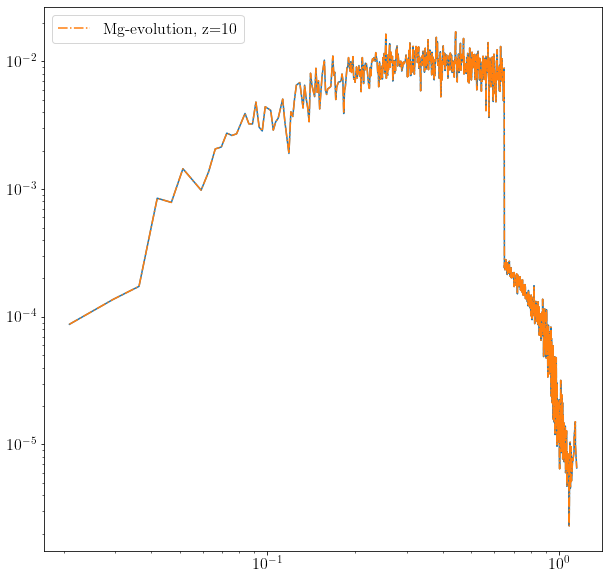

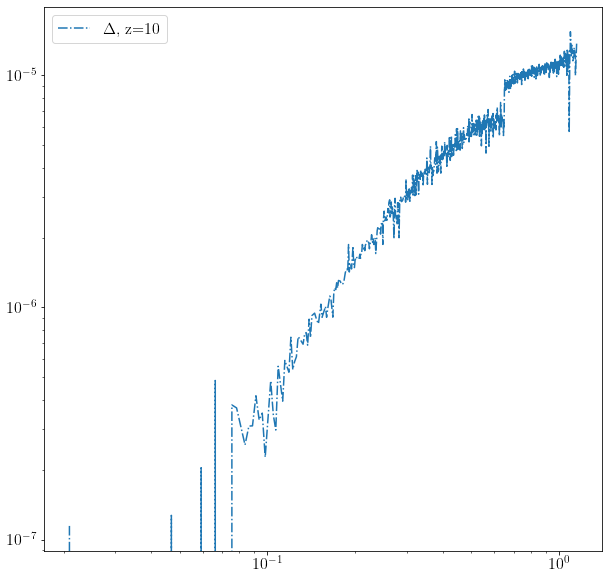

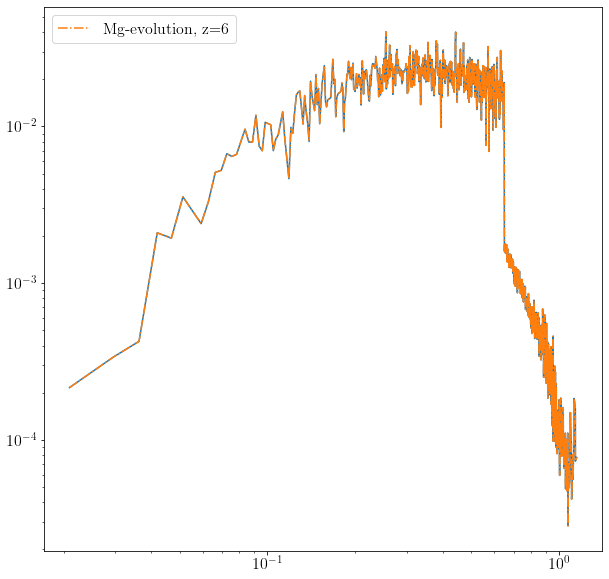

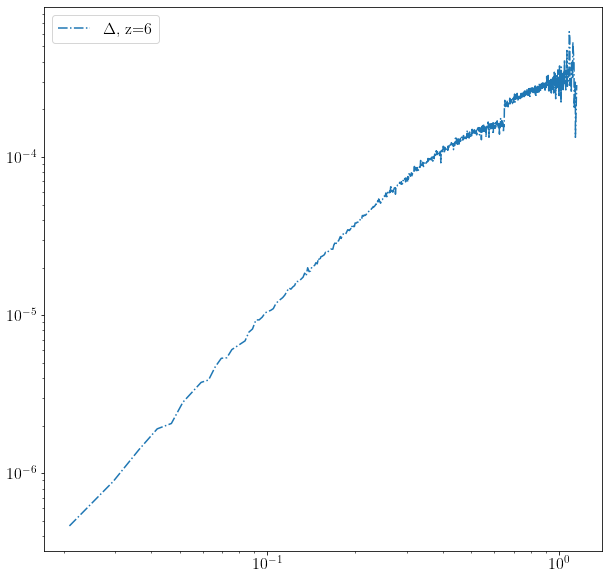

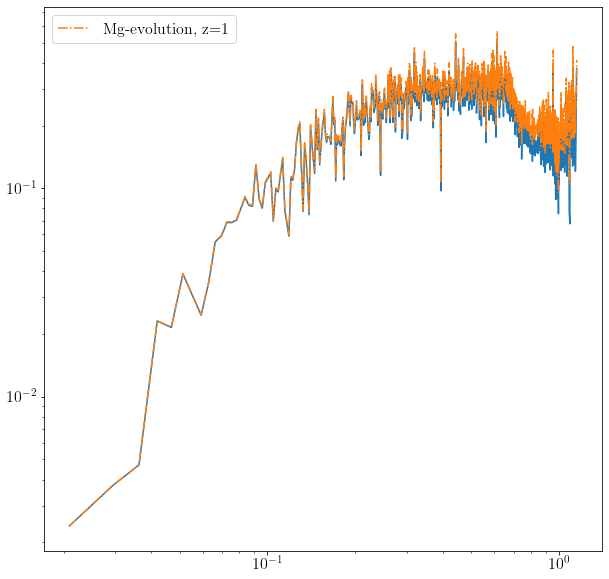

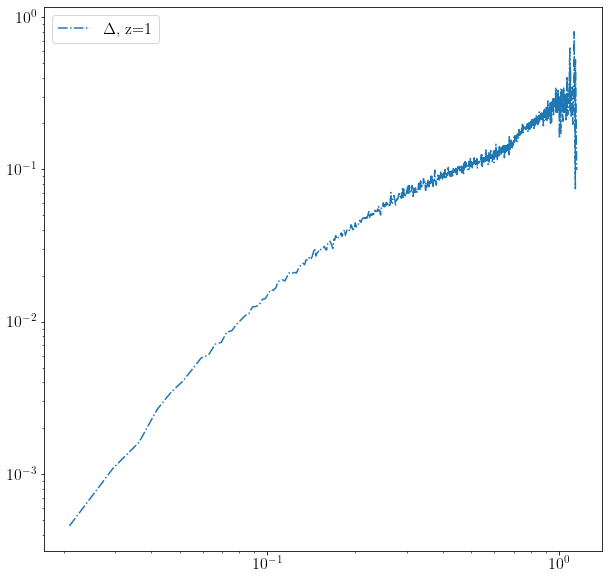

In [117]:
plt.rcParams['font.size'] = 16

for z in [10,6,1]:
    fig = plt.figure(figsize=(10,10))
    k = data['delta']['lcdm_ref']['z='+str(z)][:,0]
    pk_ref = data['delta']['lcdm_ref']['z='+str(z)][:,1]
    plt.loglog(k, pk_ref, "-")
    ###
    k = data['delta']['lcdm']['z='+str(z)][:,0]
    pk = data['delta']['lcdm']['z='+str(z)][:,1]
    plt.loglog(k, pk , "-." ,label="Mg-evolution, z="+str(z))
    plt.legend()

    fig = plt.figure(figsize=(10,10))
    k = data['delta']['lcdm_ref']['z='+str(z)][:,0]
    pk_ref = data['delta']['lcdm_ref']['z='+str(z)][:,1]
    ###
    k = data['delta']['lcdm']['z='+str(z)][:,0]
    pk = data['delta']['lcdm']['z='+str(z)][:,1]
    plt.loglog(k, np.abs(pk-pk_ref)/pk_ref , "-." ,label=r"$\Delta$, z="+str(z))
    
    plt.legend()